In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Import the libraries

In [2]:
#Download Data
df=pd.read_csv('Data_file.csv')
df

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


load the dataset, here only top 5 rows and bottom top 5 rows are showing, so we can use the next code to show full dataset.

In [3]:
#this is a huge dataset and it will take long time so we are not running this code
#pd.set_option('display.max_rows', None)
df

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [4]:
#check top 15 rows
df.head(15)

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
5,6,1,35819I70783,568.0,2257.362667,2261.460000,368.13,380.13,2.0,0.0,...,6.0,0.0,3.0,18,6,0.0,11.000000,8.333333,UPW,2016-07-02
6,7,1,96759I84459,545.0,2876.641667,2883.970000,335.75,402.90,13.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-07-05
7,8,1,09832I90846,768.0,12905.000000,17804.150000,900.35,2549.11,4.0,55.0,...,6.0,0.0,7.0,42,6,0.0,6.000000,3.857143,UPW,2016-08-05
8,9,1,59772I84450,1191.0,90.695000,90.695000,2287.50,2287.50,1.0,0.0,...,6.0,0.0,4.0,24,6,0.0,2.666667,2.666667,UPW,2016-06-15
9,10,1,56331I70783,536.0,29.357333,29.357333,612.96,612.96,11.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-06-08


In [5]:
#check the lower last 8 rows
df.tail(8)

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
209585,209586,1,12227I90843,793.0,5350.315333,5356.210000,594.80,640.20,2.0,0.0,...,6.0,0.0,5.0,30,6,0.0,5.2,5.200000,UPW,2016-07-04
209586,209587,1,60331I70370,254.0,20079.157333,20228.090000,4003.12,5173.74,2.0,0.0,...,12.0,0.0,15.0,120,12,0.0,3.0,2.400000,UPW,2016-07-22
209587,209588,1,19900I95200,239.0,14678.000000,14704.900000,12935.26,16775.60,8.0,0.0,...,12.0,1.0,3.0,24,12,1.0,0.0,30.000000,UPW,2016-08-02
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.0,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.0,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.0,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.0,10.500000,UPW,2016-07-25
209592,209593,1,65061I85339,1581.0,4489.362000,4534.820000,483.92,631.20,13.0,0.0,...,12.0,0.0,2.0,18,12,0.0,0.0,0.000000,UPW,2016-07-07


First 8 rows in output

In [6]:
#check daata information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

check the information of dataset

In [7]:
#check the data types
df.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

In [8]:
df['label'].unique()

array([0, 1], dtype=int64)

check the types of dataset

In [9]:
#data shape- column-209593, rows-37
df.shape

(209593, 37)

dataset has total rows-209593 , columns-37

In [10]:
#check columns names
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

check the columns name of dataset

In [11]:
df.describe()

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,104797.000000,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,60504.431823,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,1.000000,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52399.000000,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,104797.000000,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,157195.000000,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,209593.000000,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


Describe the dataset mean, median, mode values. Statistics use

In [12]:
#checking null values
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

As we can see that there is no null values in this dataset

We can see that he column 'Unnamed' is just blank column so we can remove it

In [13]:
#dropping column 'Unnamed'
df.drop('Unnamed: 0', axis=1, inplace=True)

In [14]:
#dropping colunmn 'pcircle, type-object'
df.drop('pcircle', axis=1, inplace=True)

In [15]:
#dropping colunmn 'msisdn, type-object'
df.drop('msisdn', axis=1, inplace=True)

In [16]:
#dropping colunmn 'pdate, type-object'
df.drop('pdate', axis=1, inplace=True)

In [17]:
#check shape again
df.shape

(209593, 33)

now shape of data is changed, rows-33, column 'Unnamed is removed

In [18]:
#check column name again
df.columns

Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90'],
      dtype='object')

Column name 'Unnanmed' and 'pcircle' is dropped now

In [19]:
total_records= df.shape[0]
Non_Defaulter=df[df['label']==1].shape[0]
Defaulter=df[df['label']==0].shape[0]


print('Total Customers: {}'.format(total_records))
print('Total Non_Defaulter Customers: {}'.format(Non_Defaulter))
print('Total Defaulter Customers: {}'.format(Defaulter))


Total Customers: 209593
Total Non_Defaulter Customers: 183431
Total Defaulter Customers: 26162


In [20]:
Non_Defaulter_percentage= (Non_Defaulter/total_records)*100
Defaulter_percentage=(Defaulter/total_records)*100

print('Total Non_Defaulter Customers Percentage: {}'.format(Non_Defaulter_percentage))
print('Total Defaulter Customers Percentage: {}'.format(Defaulter_percentage))

Total Non_Defaulter Customers Percentage: 87.5177129007171
Total Defaulter Customers Percentage: 12.482287099282896


here we ca see that total 87% customers are non Defaulter who paid their load,emi, amount
and total 12.4% customers are defaulter

In [21]:
#check the unique value in dataset
df.nunique()

label                        2
aon                       4507
daily_decr30            147026
daily_decr90            158670
rental30                132148
rental90                141033
last_rech_date_ma         1186
last_rech_date_da         1174
last_rech_amt_ma            70
cnt_ma_rech30               71
fr_ma_rech30              1083
sumamnt_ma_rech30        15141
medianamnt_ma_rech30       510
medianmarechprebal30     30428
cnt_ma_rech90              110
fr_ma_rech90                89
sumamnt_ma_rech90        31771
medianamnt_ma_rech90       608
medianmarechprebal90     29785
cnt_da_rech30             1066
fr_da_rech30              1072
cnt_da_rech90               27
fr_da_rech90                46
cnt_loans30                 40
amnt_loans30                48
maxamnt_loans30           1050
medianamnt_loans30           6
cnt_loans90               1110
amnt_loans90                69
maxamnt_loans90              3
medianamnt_loans90           6
payback30                 1363
payback9

Higest unique number column is msisdnan 

In [22]:
#finding unique number, max value, min value of each column in same time
for column in df.columns:
    print(f"========Column: {column}========")
    print(f"Number of unique values: {df[column].nunique()}")
    print(f"Max: {df[column].max()}")
    print(f"Min: {df[column].min()}")
    

========Column: label========
Number of unique values: 2
Max: 1
Min: 0
========Column: aon========
Number of unique values: 4507
Max: 999860.755167902
Min: -48.0
========Column: daily_decr30========
Number of unique values: 147026
Max: 265926.0
Min: -93.0126666666667
========Column: daily_decr90========
Number of unique values: 158670
Max: 320630.0
Min: -93.0126666666667
========Column: rental30========
Number of unique values: 132148
Max: 198926.11
Min: -23737.14
========Column: rental90========
Number of unique values: 141033
Max: 200148.11
Min: -24720.58
========Column: last_rech_date_ma========
Number of unique values: 1186
Max: 998650.3777327021
Min: -29.0
========Column: last_rech_date_da========
Number of unique values: 1174
Max: 999171.809409745
Min: -29.0
========Column: last_rech_amt_ma========
Number of unique values: 70
Max: 55000
Min: 0
========Column: cnt_ma_rech30========
Number of unique values: 71
Max: 203
Min: 0
========Column: fr_ma_rech30========
Number of unique va

As here, 'pcircle' has very less value so we can drop this column

In [23]:
df.shape

(209593, 33)

# Data Visulization

<AxesSubplot:>

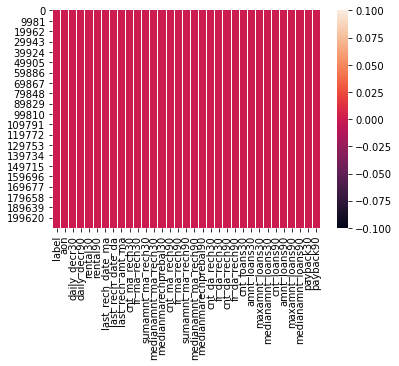

In [24]:
#check null values in heatmap
sns.heatmap(df.isnull(),xticklabels=True)

In [25]:
df.columns

Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90'],
      dtype='object')

In [26]:
df_visualization_nominal=df[['label','aon']].copy()

In [27]:
df_visualization_nominal.columns

Index(['label', 'aon'], dtype='object')

from the nominal catagorical data we will use countplot as it will give the frequenc of the columns

1    183431
0     26162
Name: label, dtype: int64


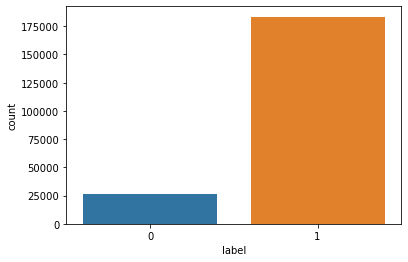

In [28]:
ax=sns.countplot(x='label',data=df_visualization_nominal)
print(df_visualization_nominal['label'].value_counts())

95.000000        392
92.000000        362
96.000000        357
99.000000        356
157.000000       349
                ... 
752400.263562      1
565434.285440      1
931525.183027      1
929670.835962      1
972326.532821      1
Name: aon, Length: 4507, dtype: int64


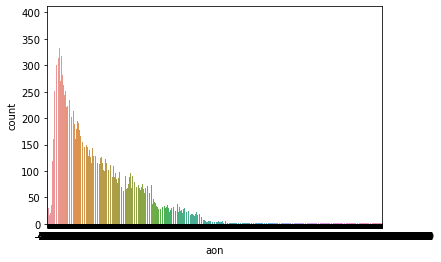

In [29]:
ax=sns.countplot(x='aon',data=df_visualization_nominal)
print(df_visualization_nominal['aon'].value_counts())

In [30]:
df_visualization_continuous=df[['daily_decr30', 'daily_decr90', 'rental30',
       'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90']].copy()

In [31]:
df_visualization_continuous.columns

Index(['daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90'],
      dtype='object')

for the continuous catagorical data we will use distplot as it will give the frequenc of the columns

<AxesSubplot:xlabel='daily_decr30', ylabel='Density'>

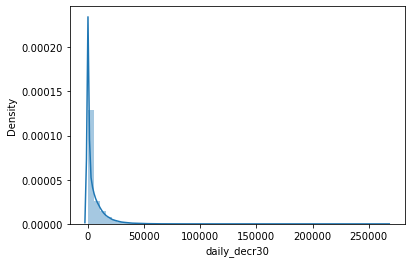

In [32]:
sns.distplot(df_visualization_continuous['daily_decr30'],kde=True)

<AxesSubplot:xlabel='daily_decr90', ylabel='Density'>

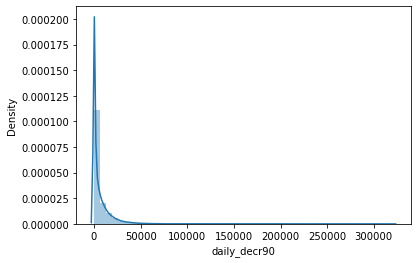

In [33]:
sns.distplot(df_visualization_continuous['daily_decr90'],kde=True)

<AxesSubplot:xlabel='rental30', ylabel='Density'>

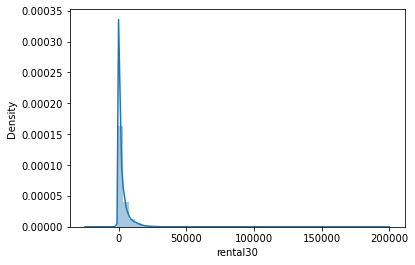

In [34]:
sns.distplot(df_visualization_continuous['rental30'],kde=True)

<AxesSubplot:xlabel='rental90', ylabel='Density'>

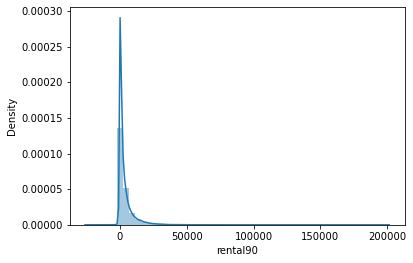

In [35]:
sns.distplot(df_visualization_continuous['rental90'],kde=True)

<AxesSubplot:xlabel='cnt_ma_rech30', ylabel='Density'>

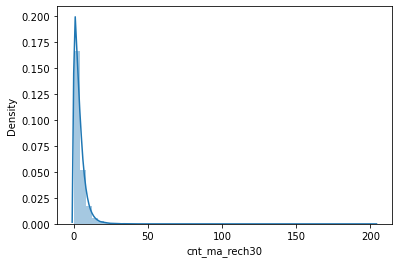

In [36]:
sns.distplot(df_visualization_continuous['cnt_ma_rech30'],kde=True)

<AxesSubplot:xlabel='fr_ma_rech30', ylabel='Density'>

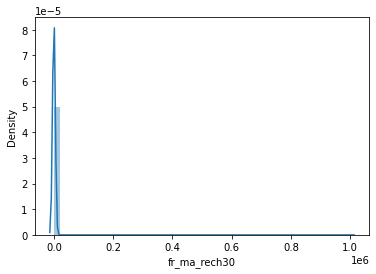

In [37]:
sns.distplot(df_visualization_continuous['fr_ma_rech30'],kde=True)

<AxesSubplot:xlabel='fr_ma_rech90', ylabel='Density'>

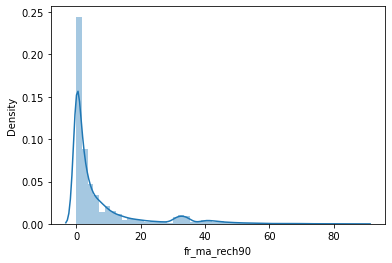

In [38]:
sns.distplot(df_visualization_continuous['fr_ma_rech90'],kde=True)

<AxesSubplot:xlabel='cnt_da_rech30', ylabel='Density'>

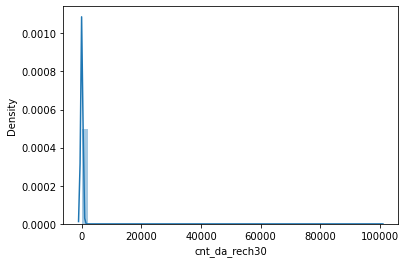

In [39]:
sns.distplot(df_visualization_continuous['cnt_da_rech30'],kde=True)

<AxesSubplot:xlabel='medianmarechprebal90', ylabel='Density'>

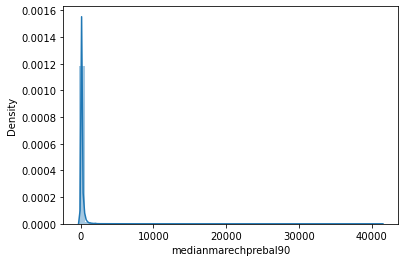

In [40]:
sns.distplot(df_visualization_continuous['medianmarechprebal90'],kde=True)

<AxesSubplot:xlabel='medianmarechprebal30', ylabel='Density'>

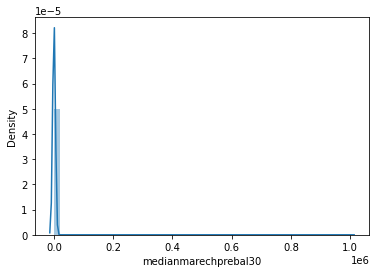

In [41]:
sns.distplot(df_visualization_continuous['medianmarechprebal30'],kde=True)

<AxesSubplot:xlabel='maxamnt_loans30', ylabel='Density'>

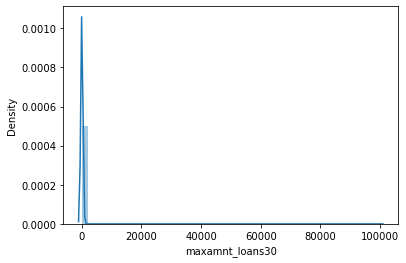

In [42]:
sns.distplot(df_visualization_continuous['maxamnt_loans30'],kde=True)

<AxesSubplot:xlabel='maxamnt_loans90', ylabel='Density'>

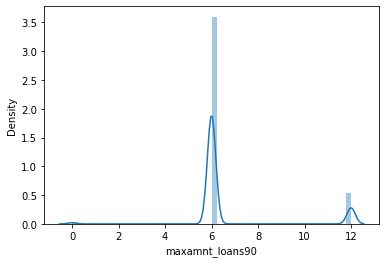

In [43]:
sns.distplot(df_visualization_continuous['maxamnt_loans90'],kde=True)

<AxesSubplot:xlabel='medianamnt_loans30', ylabel='Density'>

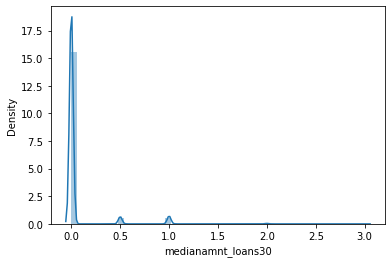

In [44]:
sns.distplot(df_visualization_continuous['medianamnt_loans30'],kde=True)

<AxesSubplot:xlabel='medianamnt_loans90', ylabel='Density'>

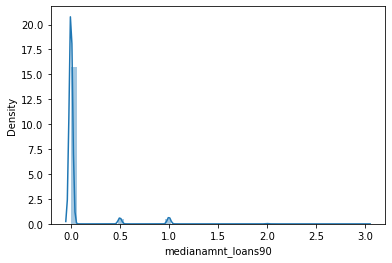

In [45]:
sns.distplot(df_visualization_continuous['medianamnt_loans90'],kde=True)

In [46]:
D=[df]
for column in D:
   column.loc[column["rental30"]<=0, 'balance_group']='no balance'
   column.loc[(column['rental30']>0) & (column['rental30']<=19800), 'balance_group']='low balance'
   column.loc[(column['rental30']>11800),'balance_group']='high balance'
    

In [47]:
count_balance_response_pct=pd.crosstab(df['label'],df['balance_group']).apply(lambda x: x/x.sum()*100)
count_balance_response_pct=count_balance_response_pct.transpose()

In [48]:
bal=pd.DataFrame(df['balance_group'].value_counts())
bal['% Subscription']=count_balance_response_pct[1]
bal.drop('balance_group',axis=1, inplace=True)
bal['bal']=[1,2,3]
bal=bal.sort_values('bal',ascending=True)

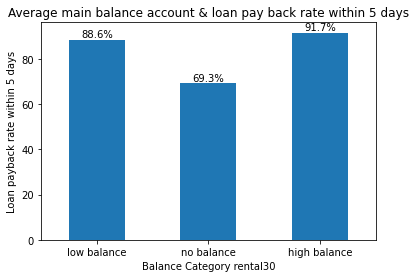

In [125]:
plot_balance= bal['% Subscription'].plot(kind='bar')
color='green'
figsize=(10,7)

plt.title('Average main balance account & loan pay back rate within 5 days')
plt.ylabel('Loan payback rate within 5 days')
plt.xlabel('Balance Category rental30')
plt.xticks(rotation='horizontal')

#lable the bar
for rec, label in zip(plot_balance.patches, bal['% Subscription'].round(1).astype(str)):
    plot_balance.text(rec.get_x()+rec.get_width()/2,rec.get_height()+1, label+'%', ha='center', color='black')
    
    


As we ca see here that people with high balance will payback the loan within 5 days.
There is risk with low balance People, will return or not return the loan within 5 days
Peoplw with no balance will not return the loan within 5 days

In [50]:
D=[df]
for column in D:
    column.loc[column["cnt_da_rech30"]<=0, 'recharge_group']='no recharge'
    column.loc[(column['cnt_da_rech30']>0) & (column['cnt_da_rech30']<=1), 'recharge_group']='low recharge'
    column.loc[(column['cnt_da_rech30']>1) & (column['cnt_da_rech30']<= 5), 'recharge_group']='avarage recharge'
    column.loc[(column['cnt_da_rech30']>5),'recharge_group']='high recharge'

In [51]:
count_recharge_response_pct=pd.crosstab(df['label'],df['recharge_group']).apply(lambda x: x/x.sum()*100)
count_recharge_response_pct=count_recharge_response_pct.transpose()

In [52]:
rec=pd.DataFrame(df['recharge_group'].value_counts())
rec['% Subscription']=count_recharge_response_pct[1]
rec.drop('recharge_group',axis=1, inplace=True)
rec['rec']=[1,2,3,4]
rec=rec.sort_values('rec',ascending=True)

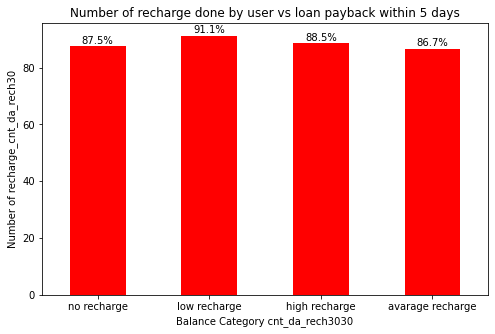

In [53]:
plot_recharge= rec['% Subscription'].plot(kind='bar',color="Red",figsize=(8,5))

plt.title('Number of recharge done by user vs loan payback within 5 days')
plt.ylabel('Number of recharge_cnt_da_rech30')
plt.xlabel('Balance Category cnt_da_rech3030')
plt.xticks(rotation='horizontal')


#lable the bar
for rec, label in zip(plot_recharge.patches, rec['% Subscription'].round(1).astype(str)):
    plot_recharge.text(rec.get_x()+rec.get_width()/2,rec.get_height()+1, label+'%', ha='center', color='black')
    

Customers with different numbers of recharge levels. the customers who have 'no recharge' and 'low recharge' will not pay loan within 5 days.
Customers with high recharge can pay the loan amt within 5 days. there is also risk with avarge recharge customers that they will pay loan amt within 5 days

In [54]:
D=[df]
for column in D:
    column.loc[column["fr_ma_rech30"]<=0, 'frequency_group']='no frequency'
    column.loc[(column['fr_ma_rech30']>0) & (column['fr_ma_rech30']<=1), 'frequency_group']='low frequency'
    column.loc[(column['fr_ma_rech30']>1) & (column['fr_ma_rech30']<= 2), 'frequency_group']='avarage frequency'
    column.loc[(column['fr_ma_rech30']>5),'frequency_group']='high frequency'

In [55]:
count_fre_response_pct=pd.crosstab(df['label'],df['frequency_group']).apply(lambda x: x/x.sum()*100)
count_fre_response_pct=count_fre_response_pct.transpose()

In [56]:
fre=pd.DataFrame(df['frequency_group'].value_counts())
fre['% Subscription']=count_fre_response_pct[1]
fre.drop('frequency_group',axis=1, inplace=True)
fre['fre']=[1,2,3,4]
fre=fre.sort_values('fre',ascending=True)

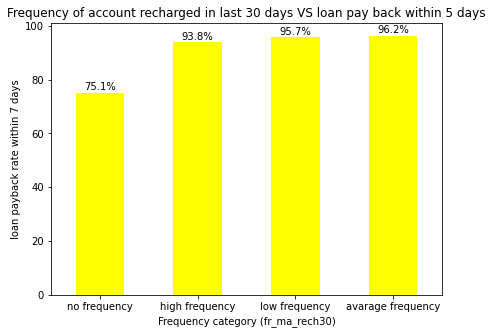

In [57]:
plot_fre= fre['% Subscription'].plot(kind='bar',color="yellow",figsize=(7,5))

plt.title('Frequency of account recharged in last 30 days VS loan pay back within 5 days')
plt.ylabel('loan payback rate within 7 days')
plt.xlabel('Frequency category (fr_ma_rech30)')
plt.xticks(rotation='horizontal')


#lable the bar
for rec, label in zip(plot_fre.patches, fre['% Subscription'].round(1).astype(str)):
    plot_fre.text(rec.get_x()+rec.get_width()/2,rec.get_height()+1, label+'%', ha='center', color='black')

Customers of different frequency levels are paying their loan within 5 daysthere is no 100% in any bar to payback loan within 5 days. According to the (no frequency & low frequency) frequency levels there are 15-25% customers who will not pay the loan within 5 days. 40-60% customers are paying theri within 7 days with avarage and high frequency level.

Visualization part is completed here

# Check Corelation with dependent variables

In [58]:
corr=df.corr()

In [59]:
corr

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
label,1.000000,-0.003785,0.168298,0.166150,0.058085,0.075521,0.003728,0.001711,0.131804,0.237331,...,0.196283,0.197272,0.000248,0.044589,0.004733,0.199788,0.084144,0.035747,0.048336,0.049183
aon,-0.003785,1.000000,0.001104,0.000374,-0.000960,-0.000790,0.001692,-0.001693,0.004256,-0.003148,...,-0.001826,-0.001726,-0.002764,0.004664,-0.000611,-0.002319,-0.001191,0.002771,0.001940,0.002203
daily_decr30,0.168298,0.001104,1.000000,0.977704,0.442066,0.458977,0.000487,-0.001636,0.275837,0.451385,...,0.366116,0.471492,-0.000028,-0.011610,0.008962,0.563496,0.400199,-0.037305,0.026915,0.047175
daily_decr90,0.166150,0.000374,0.977704,1.000000,0.434685,0.471730,0.000908,-0.001886,0.264131,0.426707,...,0.340387,0.447869,0.000025,-0.005591,0.009446,0.567204,0.397251,-0.034686,0.019400,0.040800
rental30,0.058085,-0.000960,0.442066,0.434685,1.000000,0.955237,-0.001095,0.003261,0.127271,0.233343,...,0.180203,0.233453,-0.000864,-0.016482,0.004012,0.298943,0.234211,-0.035489,0.072974,0.095147
rental90,0.075521,-0.000790,0.458977,0.471730,0.955237,1.000000,-0.001688,0.002794,0.121416,0.230260,...,0.171595,0.231906,-0.001411,-0.009467,0.005141,0.327436,0.251029,-0.034122,0.067110,0.099501
last_rech_date_ma,0.003728,0.001692,0.000487,0.000908,-0.001095,-0.001688,1.000000,0.001790,-0.000147,0.004311,...,0.001193,0.000903,0.000928,0.001835,-0.000225,0.000870,-0.001123,0.002771,-0.002233,-0.001583
last_rech_date_da,0.001711,-0.001693,-0.001636,-0.001886,0.003261,0.002794,0.001790,1.000000,-0.000149,0.001549,...,0.000380,0.000536,0.000503,0.000061,-0.000972,0.000519,0.001524,-0.002239,0.000077,0.000417
last_rech_amt_ma,0.131804,0.004256,0.275837,0.264131,0.127271,0.121416,-0.000147,-0.000149,1.000000,-0.002662,...,-0.027612,0.008502,0.001000,0.028370,0.000093,0.014067,0.148460,0.021004,-0.027369,-0.014260
cnt_ma_rech30,0.237331,-0.003148,0.451385,0.426707,0.233343,0.230260,0.004311,0.001549,-0.002662,1.000000,...,0.765802,0.752296,0.000109,-0.067011,0.014703,0.685257,0.174104,-0.071451,0.043617,0.017362


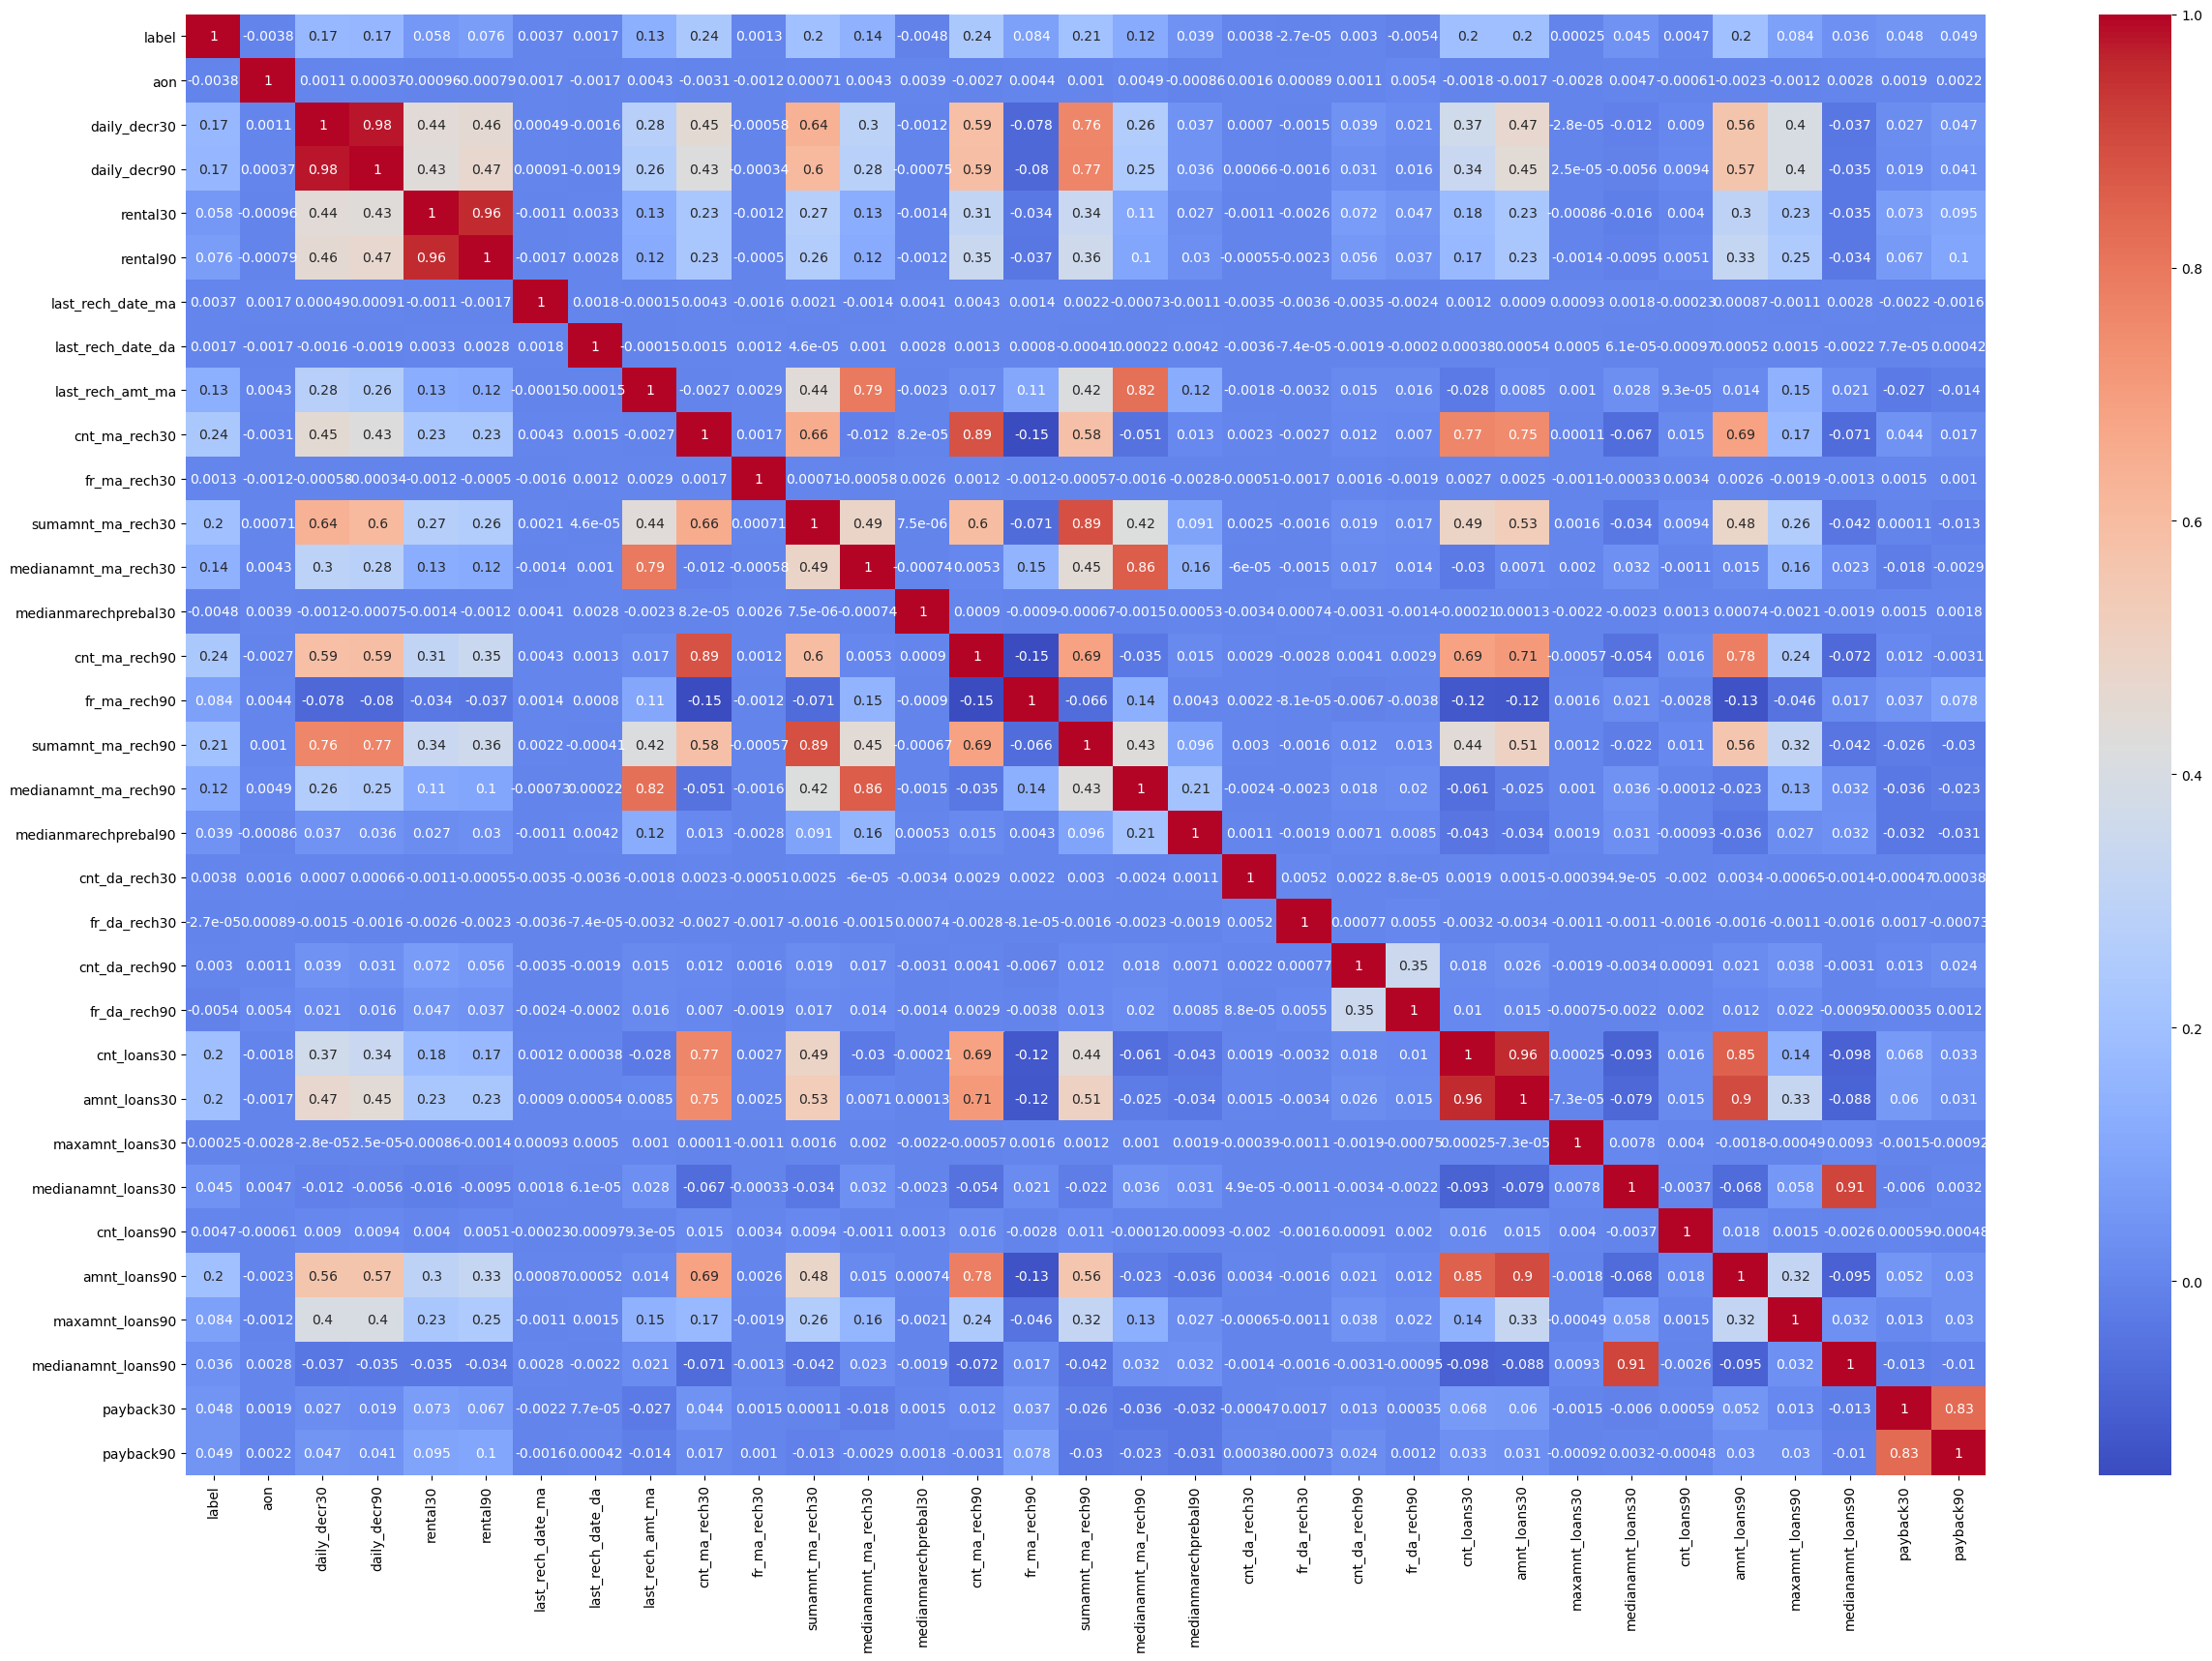

In [60]:
#example of multivariate 
ccorr=df.corr()
top_corr_features=corr.index
plt.figure(figsize=(30,20),dpi=100)
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap='coolwarm')

outpur Correlation heatmap. In this output heatmap, we can see that it is not readable, so we can use the next code to read the values

In [61]:
corr_matrix=df.corr()
corr_matrix['label'].sort_values(ascending=False)

label                   1.000000
cnt_ma_rech30           0.237331
cnt_ma_rech90           0.236392
sumamnt_ma_rech90       0.205793
sumamnt_ma_rech30       0.202828
amnt_loans90            0.199788
amnt_loans30            0.197272
cnt_loans30             0.196283
daily_decr30            0.168298
daily_decr90            0.166150
medianamnt_ma_rech30    0.141490
last_rech_amt_ma        0.131804
medianamnt_ma_rech90    0.120855
fr_ma_rech90            0.084385
maxamnt_loans90         0.084144
rental90                0.075521
rental30                0.058085
payback90               0.049183
payback30               0.048336
medianamnt_loans30      0.044589
medianmarechprebal90    0.039300
medianamnt_loans90      0.035747
cnt_loans90             0.004733
cnt_da_rech30           0.003827
last_rech_date_ma       0.003728
cnt_da_rech90           0.002999
last_rech_date_da       0.001711
fr_ma_rech30            0.001330
maxamnt_loans30         0.000248
fr_da_rech30           -0.000027
aon       

Here we can read the correlation values of label column

Vairate analysis

(<AxesSubplot:ylabel='cnt_ma_rech30'>,)

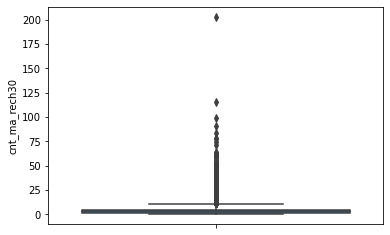

In [62]:
sns.boxplot(y='cnt_ma_rech30',data=df), #there is outliers, univariate 

(<AxesSubplot:ylabel='sumamnt_ma_rech90'>,)

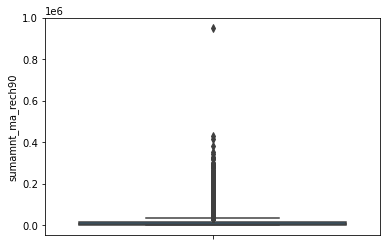

In [63]:
sns.boxplot(y='sumamnt_ma_rech90',data=df), #there is outliers

<AxesSubplot:ylabel='last_rech_amt_ma'>

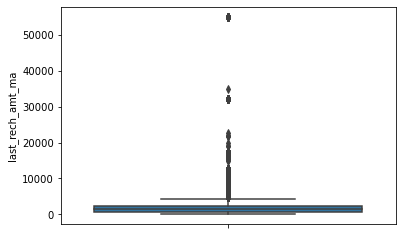

In [64]:
sns.boxplot(y='last_rech_amt_ma',data=df) #there is outliers

<AxesSubplot:xlabel='label', ylabel='count'>

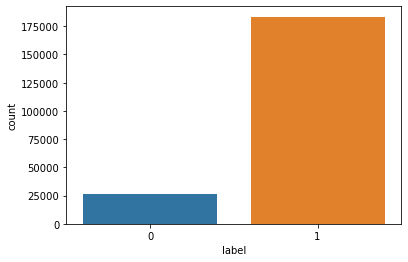

In [65]:
sns.countplot(df['label'])

<AxesSubplot:xlabel='amnt_loans90', ylabel='count'>

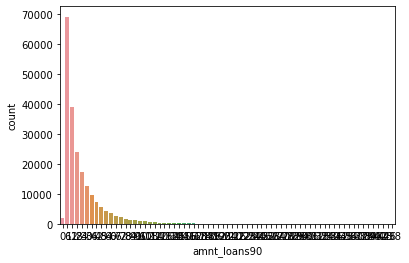

In [66]:
sns.countplot(df['amnt_loans90'])

<AxesSubplot:ylabel='count'>

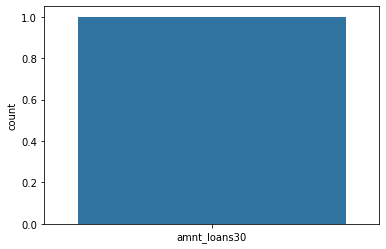

In [67]:
sns.countplot(['amnt_loans30'])

<AxesSubplot:xlabel='cnt_loans90', ylabel='count'>

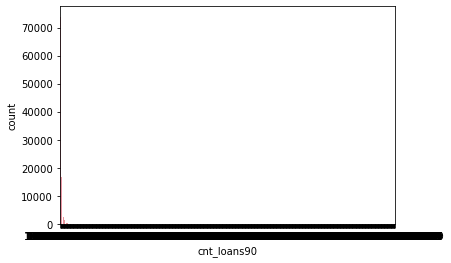

In [68]:
sns.countplot(df['cnt_loans90'])

<AxesSubplot:xlabel='cnt_loans30', ylabel='count'>

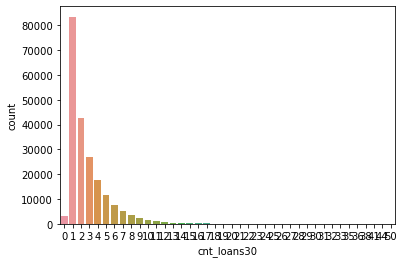

In [69]:
sns.countplot(df['cnt_loans30'])

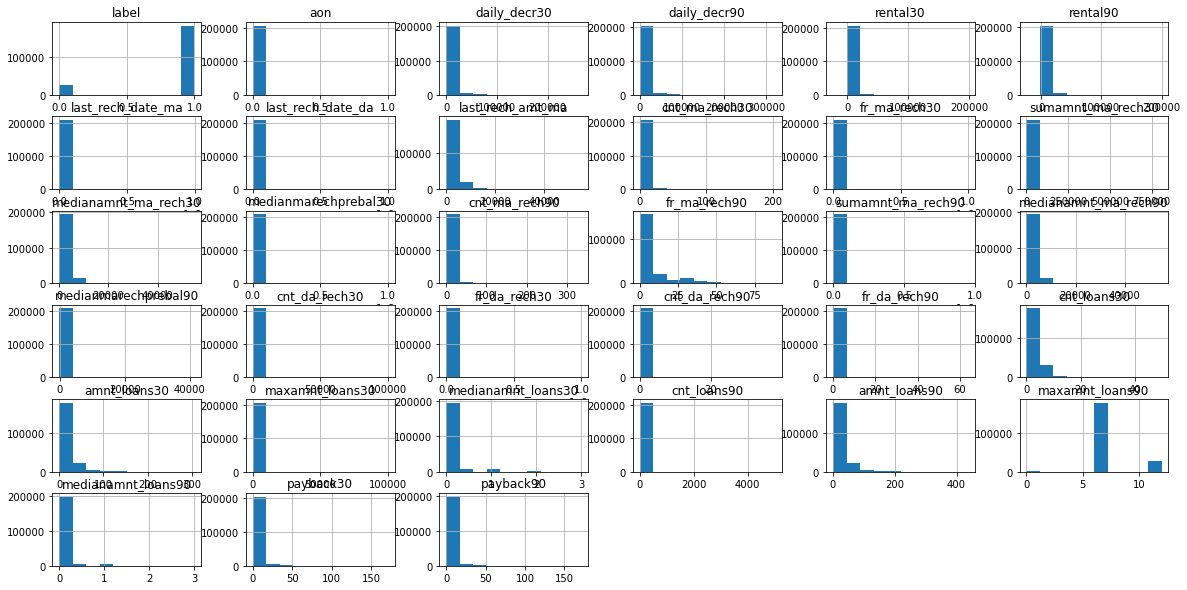

In [70]:
df.hist(figsize=(20,10))
plt.show()

<AxesSubplot:xlabel='cnt_loans30', ylabel='payback30'>

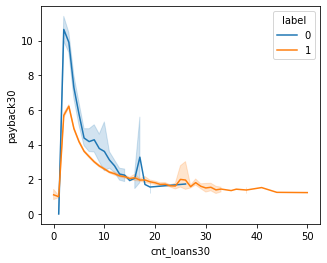

In [71]:
f,ax=plt.subplots(figsize=(5,4))
sns.lineplot(x='cnt_loans30', y='payback30', hue='label', data=df)

<AxesSubplot:xlabel='cnt_loans90', ylabel='payback90'>

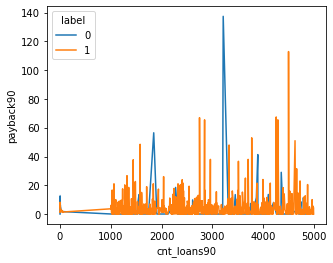

In [72]:
f,ax=plt.subplots(figsize=(5,4))
sns.lineplot(x='cnt_loans90', y='payback90', hue='label', data=df)

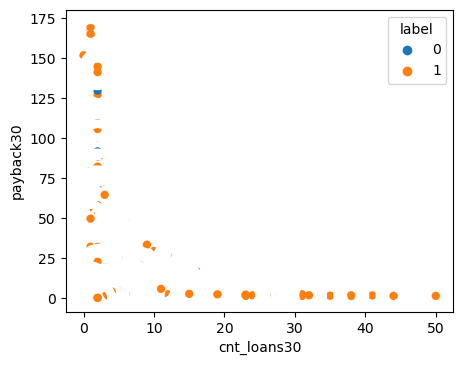

In [73]:
f,ax=plt.subplots(figsize=(5,4), dpi=100)
sns.scatterplot(x=df['cnt_loans30'], y=df['payback30'], hue='label', data=df, linewidth=20)
plt.show()

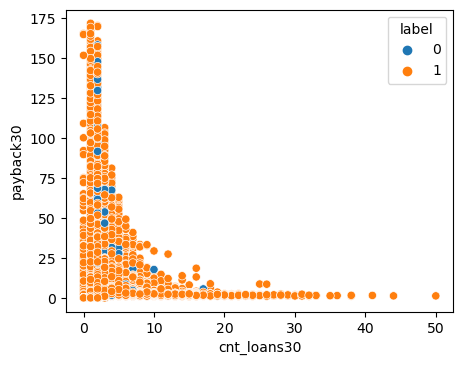

In [74]:
f,ax=plt.subplots(figsize=(5,4), dpi=100)
sns.scatterplot(x=df['cnt_loans30'], y=df['payback30'], hue='label', data=df)
plt.show()

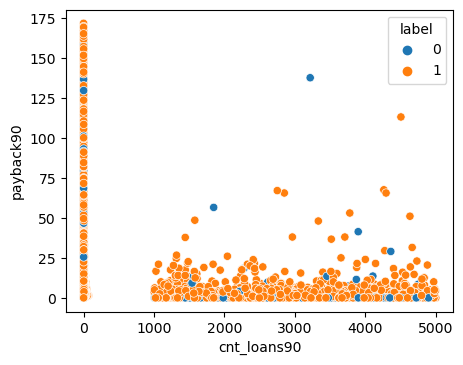

In [75]:
f,ax=plt.subplots(figsize=(5,4), dpi=100)
sns.scatterplot(x=df['cnt_loans90'], y=df['payback90'], hue='label', data=df)
plt.show()

# LabelEncoder

In [76]:
from sklearn.preprocessing import LabelEncoder


using labelencoder for dataset for object values

In [77]:
for column in df.columns:
    if df[column].dtype=='object':
        continue
    df[column]=LabelEncoder().fit_transform(df[column])    

In [78]:
clm=df.columns.values
clm

array(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30',
       'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30',
       'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90',
       'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90',
       'payback30', 'payback90', 'balance_group', 'recharge_group',
       'frequency_group'], dtype=object)

In [79]:
df

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,balance_group,recharge_group,frequency_group
0,0,279,80776,77459,13831,14958,31,11,14,2,...,0,2,2,1,0,850,1749,low balance,no recharge,high frequency
1,1,719,121866,124532,87782,84434,49,11,38,1,...,0,1,2,2,0,0,0,low balance,no recharge,no frequency
2,1,542,65527,63371,39144,35464,32,11,14,1,...,0,1,1,1,0,0,0,low balance,no recharge,no frequency
3,1,248,14834,14765,11309,11227,70,11,10,0,...,0,2,2,1,0,0,0,low balance,no recharge,no frequency
4,1,954,47175,47057,45072,40939,33,11,23,7,...,0,7,7,1,0,244,439,low balance,no recharge,avarage frequency
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,411,47276,47157,44766,40689,30,11,31,3,...,0,2,2,1,0,1,1,low balance,no recharge,avarage frequency
209589,1,1082,22869,22754,60133,55048,33,11,6,4,...,0,3,3,1,0,1,1,low balance,no recharge,low frequency
209590,1,1020,121187,123855,104943,118336,32,11,14,5,...,0,6,9,2,0,380,802,low balance,no recharge,high frequency
209591,1,1739,122729,125841,21615,37922,31,49,6,5,...,0,3,4,2,0,0,1300,low balance,no recharge,NaN


Used LabelEncoder for dataset because data contain objects type of input so we use LabelEncoder to onvert input into numbers

In [80]:
df["balance_group"].unique()

array(['low balance', 'no balance', 'high balance'], dtype=object)

In [81]:
#changning values from string to numbers
LE=LabelEncoder()
df["balance_group"]=LE.fit_transform(df["balance_group"])

df["balance_group"].unique()

array([1, 2, 0])

In [82]:
df["recharge_group"].unique()

array(['no recharge', 'high recharge', 'low recharge', 'avarage recharge'],
      dtype=object)

In [83]:
#changning values from string to numbers
LE=LabelEncoder()
df["recharge_group"]=LE.fit_transform(df["recharge_group"])

df["recharge_group"].unique()

array([3, 1, 2, 0])

In [84]:
df["frequency_group"].unique()

array(['high frequency', 'no frequency', 'avarage frequency', nan,
       'low frequency'], dtype=object)

In [85]:
df.drop('frequency_group',axis=1, inplace=True)

In [86]:
df

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,balance_group,recharge_group
0,0,279,80776,77459,13831,14958,31,11,14,2,...,1,0,2,2,1,0,850,1749,1,3
1,1,719,121866,124532,87782,84434,49,11,38,1,...,2,0,1,2,2,0,0,0,1,3
2,1,542,65527,63371,39144,35464,32,11,14,1,...,1,0,1,1,1,0,0,0,1,3
3,1,248,14834,14765,11309,11227,70,11,10,0,...,1,0,2,2,1,0,0,0,1,3
4,1,954,47175,47057,45072,40939,33,11,23,7,...,1,0,7,7,1,0,244,439,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,411,47276,47157,44766,40689,30,11,31,3,...,1,0,2,2,1,0,1,1,1,3
209589,1,1082,22869,22754,60133,55048,33,11,6,4,...,1,0,3,3,1,0,1,1,1,3
209590,1,1020,121187,123855,104943,118336,32,11,14,5,...,2,0,6,9,2,0,380,802,1,3
209591,1,1739,122729,125841,21615,37922,31,49,6,5,...,2,0,3,4,2,0,0,1300,1,3


# Removing outliers

In [87]:
df.shape

(209593, 35)

In [88]:
#we checked that thers is outliers, so we can use IQR to remove outliers
def removeOutlier(col):
    sorted(col)
    qua1,qua2 = col.quantile([0.25,0.75])
#IQR calculate 25 to 75% of data
    IQR= qua2 - qua1
    lowerRange = qua1 - (1.5*IQR)
    upperRange= qua2+(1.5*IQR)
    return lowerRange, upperRange

In [89]:
df.columns

Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90',
       'balance_group', 'recharge_group'],
      dtype='object')

In [90]:
#removeing outliers from aon Column
lowScore,highScore = removeOutlier(df['aon'])
df['aon']=np.where(df['aon']>highScore,highScore,df['aon'])
df['aon']= np.where(df['aon']<lowScore,lowScore,df['aon'])

<AxesSubplot:>

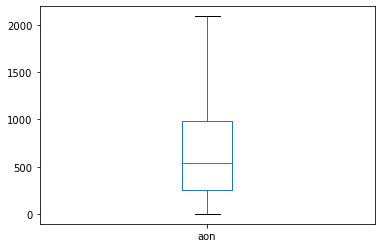

In [91]:
df['aon'].plot.box() #after remove outliers, plotting aon column again

As we can see now there is no outliers

<AxesSubplot:>

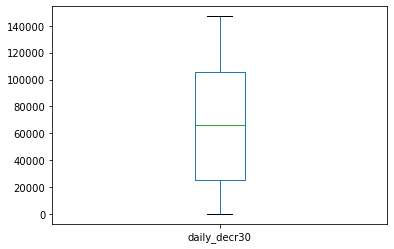

In [92]:
#removeing outliers from daily_decr30 Column
lowScore,highScore = removeOutlier(df['daily_decr30'])
df['daily_decr30']=np.where(df['daily_decr30']>highScore,highScore,df['daily_decr30'])
df['daily_decr30']= np.where(df['daily_decr30']<lowScore,lowScore,df['daily_decr30'])
df['daily_decr30'].plot.box() #after remove outliers, plotting aon column again

As we can see thar there is no outliers in daily_decr30 column

<AxesSubplot:>

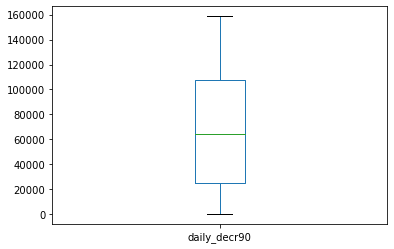

In [93]:
#removeing outliers from daily_decr90 Column
lowScore,highScore = removeOutlier(df['daily_decr90'])
df['daily_decr90']=np.where(df['daily_decr90']>highScore,highScore,df['daily_decr90'])
df['daily_decr90']= np.where(df['daily_decr90']<lowScore,lowScore,df['daily_decr90'])
df['daily_decr90'].plot.box() #after remove outliers, plotting aon column again

Now there is no outliers in daily_decr90 column

<AxesSubplot:>

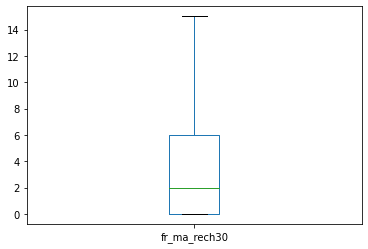

In [94]:
#removeing outliers from fr_ma_rech30 Column
lowScore,highScore = removeOutlier(df['fr_ma_rech30'])
df['fr_ma_rech30']=np.where(df['fr_ma_rech30']>highScore,highScore,df['fr_ma_rech30'])
df['fr_ma_rech30']= np.where(df['fr_ma_rech30']<lowScore,lowScore,df['fr_ma_rech30'])
df['fr_ma_rech30'].plot.box() #after remove outliers, plotting aon column again

Now there is no outliers in fr_ma_rech30 column

<AxesSubplot:>

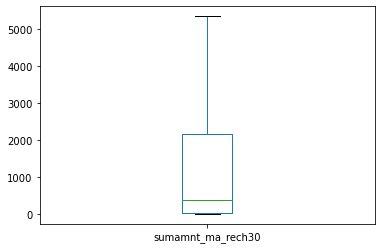

In [95]:
#removeing outliers from sumamnt_ma_rech30 Column
lowScore,highScore = removeOutlier(df['sumamnt_ma_rech30'])
df['sumamnt_ma_rech30']=np.where(df['sumamnt_ma_rech30']>highScore,highScore,df['sumamnt_ma_rech30'])
df['sumamnt_ma_rech30']= np.where(df['sumamnt_ma_rech30']<lowScore,lowScore,df['sumamnt_ma_rech30'])
df['sumamnt_ma_rech30'].plot.box() #after remove outliers, plotting aon column again

there is no outlier in sumamnt_ma_rech30 column

<AxesSubplot:>

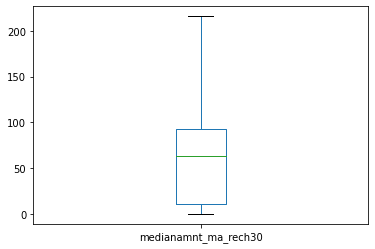

In [96]:
#removeing outliers from medianamnt_ma_rech30 Column
lowScore,highScore = removeOutlier(df['medianamnt_ma_rech30'])
df['medianamnt_ma_rech30']=np.where(df['medianamnt_ma_rech30']>highScore,highScore,df['medianamnt_ma_rech30'])
df['medianamnt_ma_rech30']= np.where(df['medianamnt_ma_rech30']<lowScore,lowScore,df['medianamnt_ma_rech30'])
df['medianamnt_ma_rech30'].plot.box() #after remove outliers, plotting aon column again

these is no outlier in medianamnt_ma_rech30 column

<AxesSubplot:>

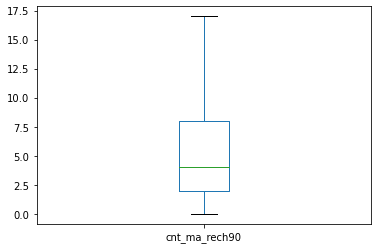

In [97]:
#removeing outliers from cnt_ma_rech90 Column
lowScore,highScore = removeOutlier(df['cnt_ma_rech90'])
df['cnt_ma_rech90']=np.where(df['cnt_ma_rech90']>highScore,highScore,df['cnt_ma_rech90'])
df['cnt_ma_rech90']= np.where(df['cnt_ma_rech90']<lowScore,lowScore,df['cnt_ma_rech90'])
df['cnt_ma_rech90'].plot.box() #after remove outliers, plotting aon column again

these is no outlier in cnt_ma_rech90 column

# Checking skewness 

In [98]:
df.skew()

label                   -2.270254
aon                      0.950867
daily_decr30             0.083578
daily_decr90             0.234606
rental30                 0.441806
rental90                 0.459810
last_rech_date_ma       16.524637
last_rech_date_da       16.904463
last_rech_amt_ma         1.074621
cnt_ma_rech30            2.684106
fr_ma_rech30             1.253282
sumamnt_ma_rech30        1.214894
medianamnt_ma_rech30     1.115317
medianmarechprebal30     0.853740
cnt_ma_rech90            0.934789
fr_ma_rech90             2.285423
sumamnt_ma_rech90        1.732703
medianamnt_ma_rech90     2.086845
medianmarechprebal90     0.777023
cnt_da_rech30           18.137741
fr_da_rech30            18.084817
cnt_da_rech90           23.642903
fr_da_rech90            26.899282
cnt_loans30              2.685234
amnt_loans30             2.955552
maxamnt_loans30         18.285158
medianamnt_loans30       4.541572
cnt_loans90             17.607075
amnt_loans90             3.136189
maxamnt_loans9

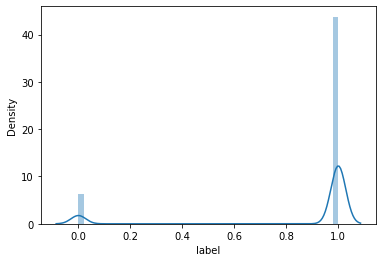

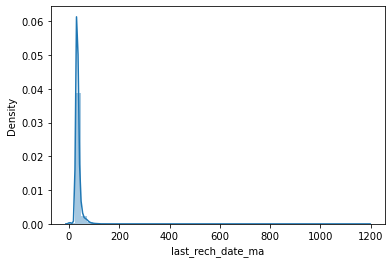

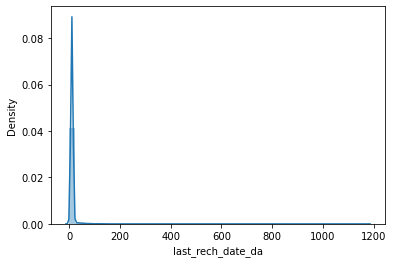

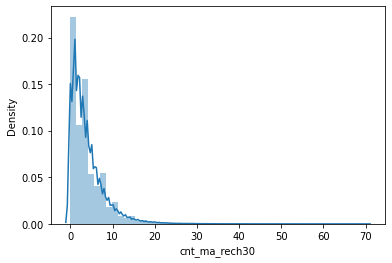

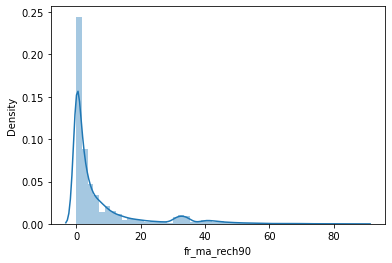

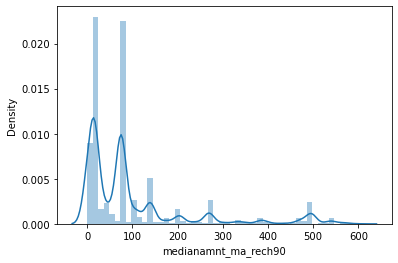

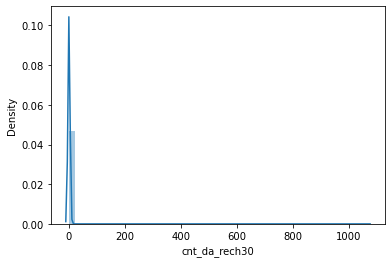

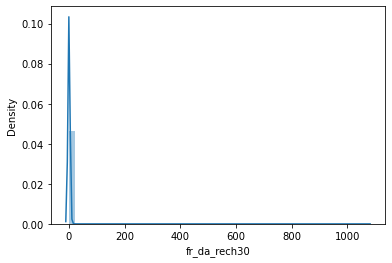

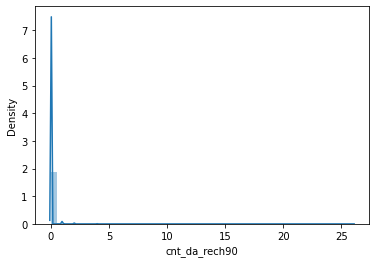

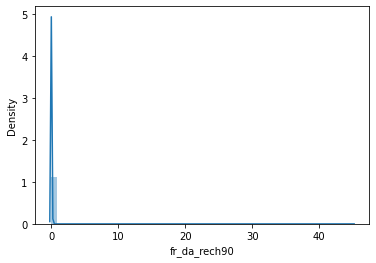

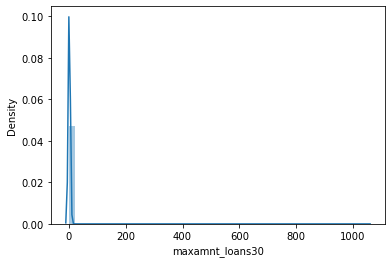

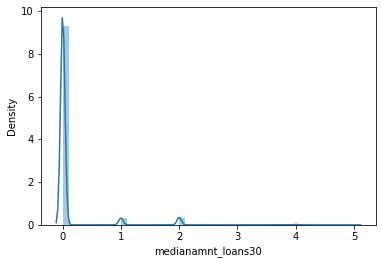

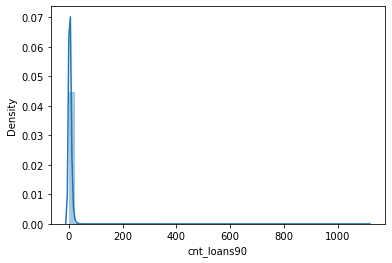

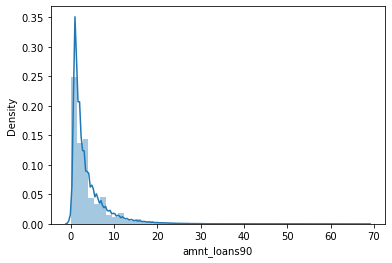

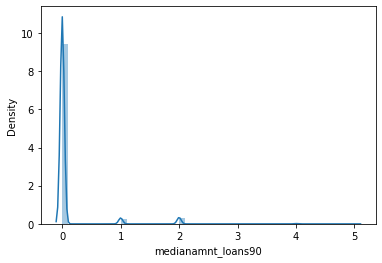

In [99]:
columns=['label','last_rech_date_ma','last_rech_date_da','cnt_ma_rech30','fr_ma_rech90','medianamnt_ma_rech90','cnt_da_rech30','fr_da_rech30','cnt_da_rech90','fr_da_rech90','maxamnt_loans30','medianamnt_loans30','cnt_loans90','amnt_loans90','medianamnt_loans90']

for i in df[columns]:
    plt.figure()
    sns.distplot(df[i])

In [100]:
columns=df.columns.tolist()
#filter the columns to remove data we donot want
columns=[c for c in columns if c not in ['label']]
target='label'
#define random state
state=np.random.RandomState(42)
x=df[columns]
y=df[target]
print(x.shape)
print(y.shape)    

(209593, 34)
(209593,)


In [101]:
#checking dafaulter and non defaulter values and shape

Defaulter= df[df['label']==0]
Non_Defaulter=df[df['label']==1]
print(Defaulter.shape, Non_Defaulter.shape)

(26162, 35) (183431, 35)


# PCA Principal_Component_Annalysis 

In [102]:
df.shape

(209593, 35)

In [103]:
from sklearn.decomposition import PCA
c=10
pca=PCA(n_components=c)
x=pca.fit_transform(x)

print('Amount of variance: %s' %pca.explained_variance_)
print('Sum of the Variance: %s' % sum(pca.explained_variance_).round(2))
print('Percantage if variance: %s' %pca.explained_variance_ratio_)
print('Sum of the parcentage of variance: %s' % sum (pca.explained_variance_ratio_))



Amount of variance: [6.11043933e+09 1.31478901e+09 9.00056696e+07 4.46579064e+07
 3.32584943e+07 9.25582155e+06 7.35377346e+06 7.95424483e+05
 2.98163711e+05 2.60357923e+05]
Sum of the Variance: 7611113954.53
Percantage if variance: [8.02826608e-01 1.72744960e-01 1.18254912e-02 5.86742680e-03
 4.36970285e-03 1.21608601e-03 9.66183392e-04 1.04507696e-04
 3.91745581e-05 3.42074042e-05]
Sum of the parcentage of variance: 0.999994347662774


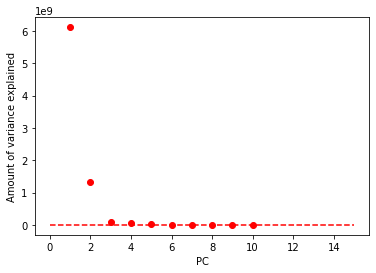

(209593, 10)


In [104]:
plt.scatter(np.arange(1,(c+1)),pca.explained_variance_,c='red')
plt.plot((0,15),(1,1),color='red', linestyle='dashed')
plt.xlabel('PC')
plt.ylabel('Amount of variance explained')
plt.show()
print(x.shape)

# importing libraries for model

Importing train_trst_split to check shape

In [105]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(146715, 10)
(62878, 10)
(146715,)
(62878,)


# Model Run,  importing libraries for classifiacation

In [106]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_curve, roc_auc_score, auc


In [107]:
df.dtypes

label                     int64
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                  int64
rental90                  int64
last_rech_date_ma         int64
last_rech_date_da         int64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30      int64
cnt_ma_rech90           float64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90      int64
medianmarechprebal90      int64
cnt_da_rech30             int64
fr_da_rech30              int64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30           int64
medianamnt_loans30        int64
cnt_loans90               int64
amnt_loans90              int64
maxamnt_loans90           int64
medianamnt_loans90        int64
payback3

In [108]:
lr=LogisticRegression()
gnb=GaussianNB()
knc=KNeighborsClassifier()
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
gbc=GradientBoostingClassifier()
abc=AdaBoostClassifier()

models=[]
models.append(('LogisticRegression', lr))
models.append(('GaussianNB',gnb))
models.append(('KNeighborsClassifier',knc))
models.append(('DecisionTreeClassifier',dtc))
models.append(('RandomForestClassifier',rfc))
models.append(('GradientBoostingClassifier',gbc))
models.append(('AdaBoostClassifier',abc))
#models.append(('SVC',svc)) taking long time




# GaussianNB classifier

In [109]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predgnb=gnb.predict(x_test)
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

0.7568943032539203
[[ 5180  2605]
 [12681 42412]]
              precision    recall  f1-score   support

           0       0.29      0.67      0.40      7785
           1       0.94      0.77      0.85     55093

    accuracy                           0.76     62878
   macro avg       0.62      0.72      0.63     62878
weighted avg       0.86      0.76      0.79     62878



# DecisionTreeClassifier 

In [110]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.8562295238398168
[[ 3549  4236]
 [ 4804 50289]]
              precision    recall  f1-score   support

           0       0.42      0.46      0.44      7785
           1       0.92      0.91      0.92     55093

    accuracy                           0.86     62878
   macro avg       0.67      0.68      0.68     62878
weighted avg       0.86      0.86      0.86     62878



# Support Vector Classifier

In [111]:
#svc=SVC(kernel='rbf') #kernel='rbf'---> default
#svc.fit(x_train,y_train)
#svc.score(x_train,y_train)
#predsvc=svc.predict(x_test)
#print('accuracy_score:',accuracy_score(y_test,predsvc))
#print('\n')
#print('confusion_matrix:',confusion_matrix(y_test,predsvc))
#print('\n')
#print('classification_report:', classification_report(y_test,predgnb))

# KNeighborsClassifier

In [112]:
from sklearn.neighbors import KNeighborsClassifier
#k=5
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print('\n')
print(confusion_matrix(y_test,predknn))
print('\n')
print(classification_report(y_test,predknn))

0.8987086103247559


[[ 3206  4579]
 [ 1790 53303]]


              precision    recall  f1-score   support

           0       0.64      0.41      0.50      7785
           1       0.92      0.97      0.94     55093

    accuracy                           0.90     62878
   macro avg       0.78      0.69      0.72     62878
weighted avg       0.89      0.90      0.89     62878



In [113]:
#if we want to do all algoretheme in same for loop

model=[LogisticRegression(),DecisionTreeClassifier(),KNeighborsClassifier(),GaussianNB(),GradientBoostingClassifier(),AdaBoostClassifier()] #SVC()

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m, 'is:')
    print('\n')
    print(accuracy_score(y_test,predm))
    print('\n')
    print(confusion_matrix(y_test,predm))
    print('\n')
    print(classification_report(y_test,predm))
    print('\n')

Accuracy score of LogisticRegression() is:


0.6027068290976176


[[ 6606  1179]
 [23802 31291]]


              precision    recall  f1-score   support

           0       0.22      0.85      0.35      7785
           1       0.96      0.57      0.71     55093

    accuracy                           0.60     62878
   macro avg       0.59      0.71      0.53     62878
weighted avg       0.87      0.60      0.67     62878



Accuracy score of DecisionTreeClassifier() is:


0.8547027577213016


[[ 3499  4286]
 [ 4850 50243]]


              precision    recall  f1-score   support

           0       0.42      0.45      0.43      7785
           1       0.92      0.91      0.92     55093

    accuracy                           0.85     62878
   macro avg       0.67      0.68      0.68     62878
weighted avg       0.86      0.85      0.86     62878



Accuracy score of KNeighborsClassifier() is:


0.8987086103247559


[[ 3206  4579]
 [ 1790 53303]]


              precision    recall  f1-s

# AUC_ROC Curve

In [114]:
#import Liabraries
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score

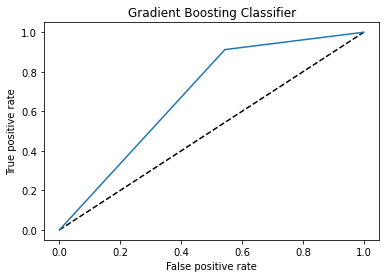

0.6843393376489647

In [115]:
# as per request AUC and ROC for linear regration
y_pred_prob=dtc.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="LogisticRegression")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("Gradient Boosting Classifier")
plt.show()
auc_score=roc_auc_score(y_test,dtc.predict(x_test))
auc_score

In [116]:
#we can check accuracy score from DTC
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
p=dt.predict(x_test)
print(accuracy_score(y_test,p))

0.8552752950157447


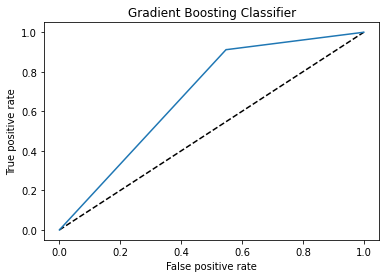

In [117]:
#Decision Tree Curve plotting
y_pred_prob=dt.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Gradient Boosting Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Gradient Boosting Classifier')
plt.show()
auc_score=roc_auc_score(y_test,dt.predict(x_test))

# Ensemble Techniques ----Classifier

Ensemble Classifier we can use for Huge or Large Datasets

In [118]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=100,random_state=42)
#randomforestclassifier(100) default

rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.9060561722701104
[[ 3019  4766]
 [ 1141 53952]]
              precision    recall  f1-score   support

           0       0.73      0.39      0.51      7785
           1       0.92      0.98      0.95     55093

    accuracy                           0.91     62878
   macro avg       0.82      0.68      0.73     62878
weighted avg       0.89      0.91      0.89     62878



In [119]:
from sklearn.ensemble import AdaBoostClassifier
#adaboostclassifier(base_estimator=decisiontreeclassifier(),n_estimators=50,learning_rate=1.0)
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
ad_pred=ad.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.8955914628327873
[[ 1981  5804]
 [  761 54332]]
              precision    recall  f1-score   support

           0       0.72      0.25      0.38      7785
           1       0.90      0.99      0.94     55093

    accuracy                           0.90     62878
   macro avg       0.81      0.62      0.66     62878
weighted avg       0.88      0.90      0.87     62878



In [120]:
#base_estimator is DecisiontreeClassifier
ad=AdaBoostClassifier(n_estimators=50)
ad.fit(x_train,y_train)
ad_pred=ad.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.8955914628327873
[[ 1981  5804]
 [  761 54332]]
              precision    recall  f1-score   support

           0       0.72      0.25      0.38      7785
           1       0.90      0.99      0.94     55093

    accuracy                           0.90     62878
   macro avg       0.81      0.62      0.66     62878
weighted avg       0.88      0.90      0.87     62878



In [121]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)

GradientBoostingClassifier()

# HYPERPARAMETER TUNNING

In [122]:
#using the GridSearch for hyper parameter tuning 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


grid_param = { "criterion": ["gini","entropy"]}

gd_sr =GridSearchCV(estimator= dtc, param_grid=grid_param,scoring="accuracy", cv=5) #defaut scoring ="accuracy"
gd_sr.fit(x,y)

best_parameters = gd_sr.best_params_
print(best_parameters)
best_result = gd_sr.best_score_
print(best_result)

# in Decision tree gini get the best result (which is default)

{'criterion': 'entropy'}
0.8587023456674941


In [123]:
# changing random_state and n_estimators to get more accuracy
rf = RandomForestClassifier(n_estimators=500,random_state=37)
#RandomForenstClassifier(100)---Default
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.9060402684563759
[[ 2979  4806]
 [ 1102 53991]]
              precision    recall  f1-score   support

           0       0.73      0.38      0.50      7785
           1       0.92      0.98      0.95     55093

    accuracy                           0.91     62878
   macro avg       0.82      0.68      0.73     62878
weighted avg       0.89      0.91      0.89     62878



# Saving Model

we are saving model here from gbc because 'GradientBoostingClassifier' given the best accuracy score of dataset

In [124]:
import joblib
#from sklearn.externals import joblib
#save the model as a object file

joblib.dump(gbc,'Micro_Loan_GBCFILE.obj')

gbc_from_joblib=joblib.load('Micro_Loan_GBCFILE.obj')

